# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad obsservacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [79]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # para quitar warnings

pd.set_option('display.max_columns', None) # muestra todas las columnas del df.head()
#pd.set_option('display.max_rows', None)    # muestra todas las filas del df

In [2]:
df = pd.read_csv('data/vehicles_messy.csv')

In [3]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

In [4]:
dim_original = df.shape

In [5]:
dim_original # dimesiones del df original

(37843, 83)

In [6]:
df.columns # columnas

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
df.make.value_counts() # cuenta el número de marcas de coches

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [8]:
df.dtypes #tipo de dato de cada columna

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [10]:
nan_cols = df.isna().sum()

In [11]:
nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [12]:
len(df)

37843

In [13]:
df.evMotor.unique() # la vamos a borrar pero hay que tener cuidado

array([nan, '62 KW AC Induction', '50 KW DC', '27 KW AC Induction',
       '67 KW AC Induction', '24 KW AC Synchronous', '288V Ni-MH',
       '330V Ni-MH', '36V Ni-MH', '245V Ni-MH', '158V Ni-MH',
       '202V Ni-MH', '300V Ni-MH', '101V Ni-MH', '275V Ni-MH',
       '126V Li-Ion', '312V Ni-MH', '67 KW AC  Induction', '67 KW AC',
       '102kW AC Induction', '49kW DC Brushless', '56kW AC Induction',
       '49 kW DC Brushless', '85 kW AC Induction', '150 kW', '80 kW DCPM',
       '111 kW', '30 kW DCPM', '270V Li-Ion', '144V Li-Ion',
       '346V Li-Ion', '115V Li-Ion', '49 kW DCPM', '52 kW AC Induction',
       '144V Ni-MH', '125 kW AC Induction', '100 kW DCPM',
       '107 kW AC Induction', '18 kW', '2 @ 150 kw (300 kw)',
       '260 kW AC Induction', '280V Li-Ion', '107 kW AC PMSM',
       '374V Li-Ion', '92 kW DCPM', '266V Li-Ion', '55 kW DCPM',
       '115 kW AC Induction', '68 kW', '220V Li-Ion',
       '225 kW AC Induction', '270 kW AC Induction', '75 kW AC PMSM',
       '82 kW AC

### Borrado de columnas con más de 10.000 valores nulos

In [14]:
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

In [15]:
df_original = df.copy()

In [16]:
df.drop(columns=nan_cols[nan_cols>1e4].index, inplace=True)

In [17]:
df.shape, dim_original

((37843, 70), (37843, 83))

In [18]:
nan_cols = df.isna().sum()

In [19]:
nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [20]:
null_col = df.isnull().sum() # hace lo mismo que isna()

In [21]:
null_col[null_col>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

### Exploración columnas `cylinders` y `displ`

In [22]:
#cylinders
bad_index = df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [23]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

In [24]:
df.cylinders.dtype

dtype('float64')

In [25]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].model.unique()

array(['Altra EV', 'RAV4 EV', 'Th!nk', 'Explorer USPS Electric',
       'Hyper-Mini', 'RX Turbo', 'RX-7', 'Ranger Pickup 2WD', 'EV1',
       'EV Plus', 'Caravan/Grand Caravan 2WD',
       'Voyager/Grand Voyager 2WD', 'S10 Electric', 'MiniE', 'Leaf',
       'fortwo electric drive cabriolet', 'fortwo electric drive coupe',
       'i-MiEV', 'Transit Connect Electric Van',
       'Transit Connect Electric Wagon', 'Active E', 'CODA',
       'Focus Electric', 'Model S', 'Fit EV',
       'fortwo electric drive convertible', 'iQ EV',
       'Model S (60 kW-hr battery pack)',
       'Model S (85 kW-hr battery pack)', 'e6', '500e',
       'Model S (40 kW-hr battery pack)', 'Spark EV', 'i3 BEV',
       'B-Class Electric Drive', 'Soul Electric', 'e-Golf',
       'Model S AWD (85 kW-hr battery pack)', 'Model S AWD - P85D',
       'Model S AWD - 85D', 'Model S AWD - 70D', 'Model S AWD - 90D',
       'Model S AWD - P90D', 'Model X AWD - 90D', 'Model X AWD - P90D',
       'B250e', 'Leaf (24 kW-hr batt

**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [26]:
df[['cylinders', 'displ']] = df[['cylinders', 'displ']].fillna(0) # rellenamos los datos nulos con cero

In [27]:
df[['cylinders', 'displ']].fillna(0, inplace=True) # hace lo mismo que la casilla de arriba

In [28]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head()

,make,model,fuelType,cylinders,displ
7138,Nissan,Altra EV,Electricity,0.0,0.0
7139,Toyota,RAV4 EV,Electricity,0.0,0.0
8143,Toyota,RAV4 EV,Electricity,0.0,0.0
8144,Ford,Th!nk,Electricity,0.0,0.0
8146,Ford,Explorer USPS Electric,Electricity,0.0,0.0


In [29]:
nan_cols = df.isnull().sum()

In [30]:
nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

### Exploración columna `drive`

In [31]:
bad_index = df.drive[df.drive.isna()].index

In [32]:
bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [33]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head()

,make,model,fuelType,drive
7138,Nissan,Altra EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8147,Nissan,Hyper-Mini,Electricity,NaN
18217,Alfa Romeo,Spider Veloce 2000,Regular,NaN
18218,Bertone,X1/9,Regular,NaN


**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

In [34]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

In [35]:
df.drive.fillna('unknown', inplace=True)

In [36]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

trany    11
dtype: int64

### Exploración columna `trany`

In [37]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [38]:
bad_index = df.trany[df.trany.isna()].index

In [39]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'trany']].head()

,make,model,fuelType,trany
7138,Nissan,Altra EV,Electricity,NaN
7139,Toyota,RAV4 EV,Electricity,NaN
8143,Toyota,RAV4 EV,Electricity,NaN
8144,Ford,Th!nk,Electricity,NaN
8146,Ford,Explorer USPS Electric,Electricity,NaN


In [40]:
df.trany.fillna('unknown', inplace=True)

In [41]:
nan_cols = df.isna().sum()

In [42]:
nan_cols[nan_cols >0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [43]:
df.drop_duplicates().shape, df.shape # son iguales no hay duplicados

((37843, 70), (37843, 70))

In [44]:
df.drop_duplicates().shape, df.drop_duplicates().shape == df.shape

((37843, 70), True)

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df[df.duplicated(keep=False)] # para mostrar filas duplicadas

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb


### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [47]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

['charge120']

In [48]:
df.charge120.value_counts()

0.0    37843
Name: charge120, dtype: int64

In [49]:
df.drop(cte_cols, axis=1, inplace=True)

In [50]:
cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

In [51]:
cte_str_cols = []

for c in df.select_dtypes(include='object'): # para columnas de tipo No numérico
    
    if len(df[c].unique())==1:
        cte_str_cols.append(c)
        
cte_str_cols

[]

In [52]:
df.shape, dim_original

((37843, 69), (37843, 83))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

Indice IQR https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico

In [53]:
#stats

stats = df.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
youSaveSpend,37843.0,-2658.999022,2553.098329,-22250.0,-4250.0,-2500.0,-750.0,4000.0,3500.0
charge240b,37843.0,0.004360,0.142776,0.0,0.0,0.0,0.0,7.0,0.0
phevCity,37843.0,0.069313,1.966806,0.0,0.0,0.0,0.0,97.0,0.0
phevHwy,37843.0,0.068203,1.871986,0.0,0.0,0.0,0.0,79.0,0.0
phevComb,37843.0,0.068573,1.913647,0.0,0.0,0.0,0.0,88.0,0.0


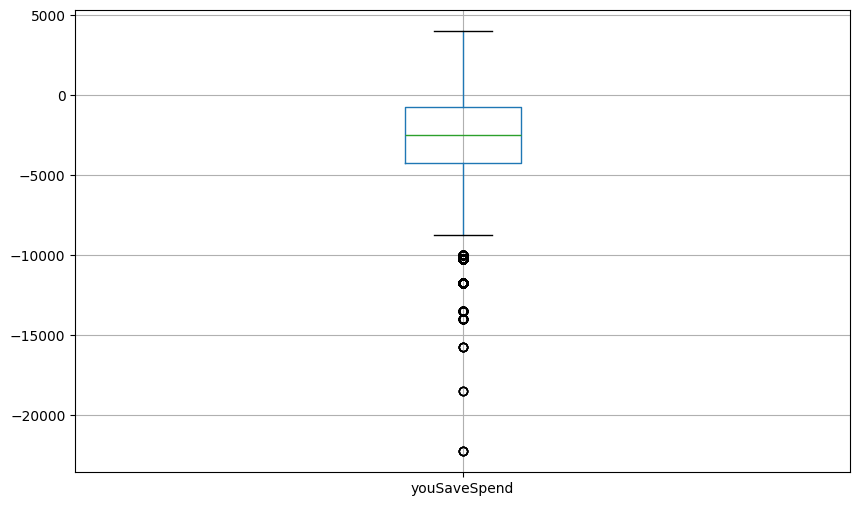

In [54]:
df[['youSaveSpend']].boxplot(figsize=(10,6));

Definición de valor atípico (outlier): https://es.wikipedia.org/wiki/Valor_at%C3%ADpico

In [55]:
outliers = pd.DataFrame(columns=stats.index)

outliers

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb


In [56]:
for c in stats.index:
    
    iqr = stats.at[c, 'IQR']
    
    cut_off = 1.5 * iqr # test tukey
    
    lower = stats.at[c, '25%'] - cut_off
    upper = stats.at[c, '75%'] + cut_off
    
    res = df[(df[c] < lower) | (df[c] > upper)].copy()
    
    res['outliers'] = c
    
    outliers = outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

highway08U         7299
city08U            7299
comb08U            7299
engId              6677
lv2                6250
pv2                6239
co2                5854
ghgScore           5815
feScore            5815
hlv                4615
hpv                4614
city08             1470
UCity              1440
highwayA08         1408
cityA08            1408
barrelsA08         1408
combA08            1408
fuelCostA08        1372
UCityA             1362
UHighwayA          1362
lv4                1357
co2TailpipeAGpm    1353
highway08           996
comb08              969
UHighway            893
cylinders           853
co2TailpipeGpm      830
highwayA08U         740
cityA08U            740
combA08U            740
youSaveSpend        604
fuelCost08          604
co2A                525
ghgScoreA           518
barrels08           432
combE               175
cityE               175
highwayE            175
charge240           152
range               120
rangeCity            93
rangeHwy        

In [57]:
def get_outliers(stats:pd.DataFrame, threshold: float = 1.5)-> pd.DataFrame:
    '''
        Esta función recibe un dataframe del tipo df.describe().T
        
        Nos devuelve un dataframe con los outliers
        
        Params:
            stats = pd.DataFrame.describe().T
            threshold = float, con el umbral de tukey
        
        Return:
            pd.DataFrame
    
    '''
    
    outliers = pd.DataFrame(columns=stats.index)
    
    for c in stats.index:
        iqr = stats.at[c, 'IQR']
        
        cut_off = threshold * iqr 
        
        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off
        
        res = df[(df[c] < lower) | (df[c] > upper)].copy()
        
        res['outliers'] = c
        
        outliers = outliers.append(res, sort=True)
        
    return outliers

In [58]:
outliers.head()

,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge240,charge240b,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,createdOn,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,modifiedOn,mpgData,outliers,phevBlended,phevCity,phevComb,phevHwy,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,year,youSaveSpend
47,11.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1004,0,0,Dodge,B150/B250 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
58,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2854,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1005,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
69,12.0,0.0,15.0,0.0,Vans,32.961,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.2,Rear-Wheel Drive,2850,-1,3350,0,Regular,Regular Gasoline,-1,-1,11,0.0,0,0.0,0.0,0.0,0.0,0,0,1006,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
80,11.0,0.0,14.0,0.0,Vans,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,5.9,Rear-Wheel Drive,2890,-1,3350,0,Regular,Regular Gasoline,-1,-1,10,0.0,0,0.0,0.0,0.0,0.0,0,0,1007,0,0,Dodge,B350 Wagon 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,1985,-10000
275,11.0,0.0,16.0,0.0,Standard Pickup Trucks,32.961,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,888.7,10,0.0,0,0.0,0.0,0.0,0.0,Tue Jan 01 00:00:00 EST 2013,8.0,7.4,Rear-Wheel Drive,4880,-1,3350,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,10245,0,0,Chevrolet,C1500 Pickup 2WD,Tue Jan 01 00:00:00 EST 2013,N,barrels08,False,0,0,0,0,0,0,0.0,0.0,0.0,0.0,Automatic 4-spd,1993,-10000


In [59]:
clean_index = [i for i in df.index if i not in outliers.index]

In [60]:
len(clean_index)

15824

In [61]:
clean_index[:10]

[0, 14, 25, 33, 34, 36, 41, 48, 49, 50]

In [62]:
df = df.iloc[clean_index]

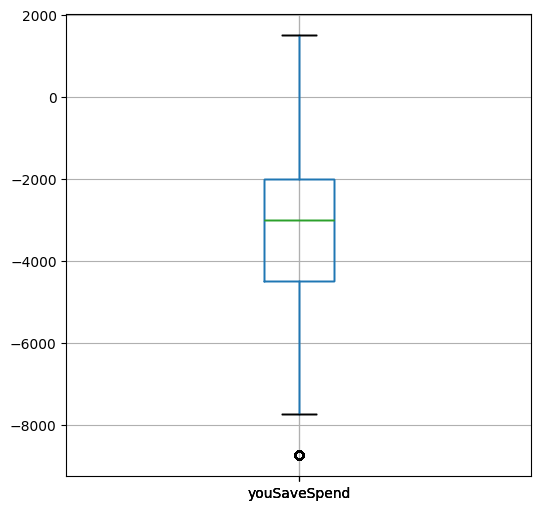

In [80]:
df[['youSaveSpend']].boxplot(figsize=(6,6)); #SI IMPORTO MATHPLOTLIB Y PONGO PLT.SHOW()
plt.show()

*Debemos tener en cuenta que siempre habrá valores atípicos cuando filtremos nuestros datos, por lo que solamente eliminaremos los valores atípicos una sola vez, porque corremos el riesgo de quedarnos sin datos*

### Colinealidad  

Columnas con la misma información.

In [236]:
df.corr().head() # matriz de correlación, si vemos valores nulos es porque la varianza = 0

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
barrels08,1.00000,NaN,NaN,-0.93583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999924,-0.96505,NaN,NaN,NaN,NaN,NaN,NaN,0.752395,0.811233,0.334073,NaN,0.906513,NaN,NaN,NaN,-0.946328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.276821,NaN,-0.494419,NaN,NaN,-0.507888,NaN,NaN,NaN,NaN,NaN,-0.936067,NaN,-0.946844,NaN,-0.337044,-0.906513,NaN,NaN,NaN,NaN
barrelsA08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charge240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city08,-0.93583,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.937518,0.97847,NaN,NaN,NaN,NaN,NaN,NaN,-0.762075,-0.773238,-0.248624,NaN,-0.896825,NaN,NaN,NaN,0.913937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217218,NaN,0.435087,NaN,NaN,0.438249,NaN,NaN,NaN,NaN,NaN,0.995095,NaN,0.915614,NaN,0.245314,0.896825,NaN,NaN,NaN,NaN
city08U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number):
    
    if df[c].std()==0:
        cte_cols.append(c)

cte_cols

['barrelsA08',
 'charge240',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'feScore',
 'fuelCostA08',
 'ghgScore',
 'ghgScoreA',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'lv2',
 'pv2',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [238]:
df = df.drop(columns=cte_cols, axis=1)

In [239]:
df.corr().head()

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,phevBlended,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.935830,0.999924,-0.965050,0.752395,0.811233,0.334073,0.906513,-0.946328,-0.276821,-0.494419,NaN,-0.507888,-0.936067,-0.946844,-0.337044,-0.906513
city08,-0.935830,1.000000,-0.937518,0.978470,-0.762075,-0.773238,-0.248624,-0.896825,0.913937,0.217218,0.435087,NaN,0.438249,0.995095,0.915614,0.245314,0.896825
co2TailpipeGpm,0.999924,-0.937518,1.000000,-0.966465,0.751088,0.808601,0.331573,0.907603,-0.947356,-0.275843,-0.494017,NaN,-0.507476,-0.937709,-0.947834,-0.335116,-0.907603
comb08,-0.965050,0.978470,-0.966465,1.000000,-0.734731,-0.770555,-0.283574,-0.899144,0.966828,0.248932,0.503415,NaN,0.512015,0.982336,0.968445,0.292878,0.899144
cylinders,0.752395,-0.762075,0.751088,-0.734731,1.000000,0.893697,0.202551,0.743328,-0.659147,-0.118147,-0.215063,NaN,-0.203682,-0.761856,-0.659978,-0.126770,-0.743328


In [240]:
df = df.drop('phevBlended', axis=1)

In [241]:
df.corr()

,barrels08,city08,co2TailpipeGpm,comb08,cylinders,displ,engId,fuelCost08,highway08,id,lv4,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.935830,0.999924,-0.965050,0.752395,0.811233,0.334073,0.906513,-0.946328,-0.276821,-0.494419,-0.507888,-0.936067,-0.946844,-0.337044,-0.906513
city08,-0.935830,1.000000,-0.937518,0.978470,-0.762075,-0.773238,-0.248624,-0.896825,0.913937,0.217218,0.435087,0.438249,0.995095,0.915614,0.245314,0.896825
co2TailpipeGpm,0.999924,-0.937518,1.000000,-0.966465,0.751088,0.808601,0.331573,0.907603,-0.947356,-0.275843,-0.494017,-0.507476,-0.937709,-0.947834,-0.335116,-0.907603
comb08,-0.965050,0.978470,-0.966465,1.000000,-0.734731,-0.770555,-0.283574,-0.899144,0.966828,0.248932,0.503415,0.512015,0.982336,0.968445,0.292878,0.899144
cylinders,0.752395,-0.762075,0.751088,-0.734731,1.000000,0.893697,0.202551,0.743328,-0.659147,-0.118147,-0.215063,-0.203682,-0.761856,-0.659978,-0.126770,-0.743328
displ,0.811233,-0.773238,0.808601,-0.770555,0.893697,1.000000,0.318377,0.731635,-0.725555,-0.184449,-0.344986,-0.346170,-0.774059,-0.727275,-0.214355,-0.731635
engId,0.334073,-0.248624,0.331573,-0.283574,0.202551,0.318377,1.000000,0.191826,-0.308908,-0.665605,-0.207687,-0.236535,-0.251088,-0.311117,-0.808514,-0.191826
fuelCost08,0.906513,-0.896825,0.907603,-0.899144,0.743328,0.731635,0.191826,1.000000,-0.847817,-0.158090,-0.357152,-0.348663,-0.896268,-0.847984,-0.184535,-1.000000
highway08,-0.946328,0.913937,-0.947356,0.966828,-0.659147,-0.725555,-0.308908,-0.847817,1.000000,0.278366,0.575191,0.592717,0.917533,0.997583,0.343064,0.847817
id,-0.276821,0.217218,-0.275843,0.248932,-0.118147,-0.184449,-0.665605,-0.158090,0.278366,1.000000,0.121284,0.144848,0.219417,0.278024,0.733531,0.158090


In [242]:
# criterio de colianelidad (criterio de correlación)

colineales = []

for c in df._get_numeric_data(): # para cada columna numerica ...
    
    for i in range(len(df.corr())): # vamos a recorrer la matriz de correlación ..
        #si la correlacion está entre 0,9 y 1, me devuelve la columna, si tienen esta correlacion no me hace falta tener las dos porque se parecen
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1: # el umbral es arbitrario, abs es el valor absoluto del dato
            print(f'Columna que estay explorando: {c} ')
            
            print(f'Valor de la matriz de correlación: {df.corr()[c][i]}')
            colineales.append(c)

colineales = list(set(colineales)) #aplicamos el set para que no me devuelva las columnas repetidas

len(colineales)

Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.9358301656398451
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: 0.9999236018577922
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.9650497598482326
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: 0.9065126390724985
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.946327613957013
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.9360672662056103
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.9468436776091511
Columna que estay explorando: barrels08 
Valor de la matriz de correlación: -0.9065126390725026
Columna que estay explorando: city08 
Valor de la matriz de correlación: -0.9358301656398451


Columna que estay explorando: city08 
Valor de la matriz de correlación: -0.9375175988025544
Columna que estay explorando: city08 
Valor de la matriz de correlación: 0.978470190821394
Columna que estay explorando: city08 
Valor de la matriz de correlación: 0.9139371188883232
Columna que estay explorando: city08 
Valor de la matriz de correlación: 0.9950949272453818
Columna que estay explorando: city08 
Valor de la matriz de correlación: 0.9156142090467497
Columna que estay explorando: co2TailpipeGpm 
Valor de la matriz de correlación: 0.9999236018577922
Columna que estay explorando: co2TailpipeGpm 
Valor de la matriz de correlación: -0.9375175988025544
Columna que estay explorando: co2TailpipeGpm 
Valor de la matriz de correlación: -0.9664646642353603
Columna que estay explorando: co2TailpipeGpm 
Valor de la matriz de correlación: 0.9076030914258268
Columna que estay explorando: co2TailpipeGpm 
Valor de la matriz de correlación: -0.9473555244697182
Columna que estay explorando: co2Tail

11

In [243]:
colineales

['UCity',
 'highway08',
 'pv4',
 'barrels08',
 'UHighway',
 'lv4',
 'fuelCost08',
 'city08',
 'youSaveSpend',
 'co2TailpipeGpm',
 'comb08']

In [244]:
df = df.drop(columns=colineales, axis=1)

In [245]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,Manual 4-spd,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,Automatic 4-spd,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,Automatic 4-spd,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


In [246]:
df.shape, dim_original

((15824, 15), (37843, 83))

### Limpieza columna `trany`

In [247]:
df.trany.value_counts()

Automatic 4-spd                     6334
Manual 5-spd                        3214
Automatic 5-spd                     1347
Automatic 3-spd                      959
Manual 4-spd                         888
Manual 6-spd                         788
Automatic (S6)                       737
Automatic (S5)                       492
Automatic 6-spd                      401
Automatic (variable gear ratios)     202
Automatic 7-spd                      129
Automatic (S4)                       127
Manual 3-spd                          76
Automatic (S7)                        50
Automatic (S8)                        44
Auto(AV-S6)                           11
Auto(AM6)                              6
Automatic (AV-S6)                      6
Auto(L4)                               2
Auto(L3)                               2
Automatic 8-spd                        2
Auto(AM7)                              2
unknown                                1
Automatic (AM6)                        1
Automatic (AV)  

In [248]:
# una de la muchas maneras que podemos hacerlo

df.trany = df.trany.str.replace('-', '') #quitar los guiones

df.trany = df.trany.str.replace('Automatic', 'Auto') #reemplazar 

df.trany = df.trany.str.replace('Auto\(', 'Auto') #cuando encuentre auto espacio parentesis

df.trany = df.trany.str.replace('Manual\(', 'Manual')

df.trany = df.trany.str.replace('\(', '')

df.trany.unique()

array(['Manual 5spd', 'Auto 3spd', 'Manual 4spd', 'Auto 4spd',
       'Manual 3spd', 'Manual 6spd', 'Auto 5spd', 'Auto S4)', 'Auto S5)',
       'Auto variable gear ratios)', 'Auto 6spd', 'Auto S6)', 'Auto 7spd',
       'Auto S7)', 'Auto S8)', 'unknown', 'Auto AM6)', 'AutoAM6)',
       'Auto AVS6)', 'AutoL4)', 'AutoL3)', 'Auto AV)', 'AutoAVS6)',
       'Auto AVS8)', 'Auto 8spd', 'AutoAM7)'], dtype=object)

Esta manera es mas rapida que la de arriba:

In [249]:
df.trany[df.trany.str.startswith('Au')] = 'AUTO' # si empieza por au... auto
df.trany[df.trany.str.startswith('Ma')] = 'MANUAL' # si empieza por Ma... Manual

In [250]:
df.trany.value_counts()

AUTO       10857
MANUAL      4966
unknown        1
Name: trany, dtype: int64

In [251]:
df.drop(df[df.trany=='unknown'].index, axis=0, inplace=True)

In [252]:
df.trany.value_counts()

AUTO      10857
MANUAL     4966
Name: trany, dtype: int64

In [253]:
df.head()

,cylinders,displ,drive,engId,fuelType,fuelType1,id,make,model,mpgData,trany,VClass,year,createdOn,modifiedOn
0,4.0,2.0,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,Alfa Romeo,Spider Veloce 2000,Y,MANUAL,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
14,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1001,Dodge,B150/B250 Wagon 2WD,N,AUTO,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
25,8.0,5.2,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1002,Dodge,B150/B250 Wagon 2WD,N,MANUAL,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
33,8.0,4.6,Front-Wheel Drive,4620,Premium,Premium Gasoline,10027,Cadillac,Seville,Y,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013
34,8.0,4.9,Front-Wheel Drive,4640,Premium,Premium Gasoline,10028,Cadillac,Seville,N,AUTO,Midsize Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013


## DataFrame Final

In [83]:
df.reset_index(drop=True, inplace = True) #para que quede limpio limpio, con sus indices ordenados

In [84]:
df.head()

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,25.354615,0.0,0.0,12,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,683.615385,13,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,0,Regular,Regular Gasoline,-1,-1,15,0.0,0,0.0,0.0,0.0,0.0,0,0,1001,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,14.4444,0.0,21.0,0.0,Vans,1985,-6000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,25.354615,0.0,0.0,11,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,683.615385,13,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,0,Regular,Regular Gasoline,-1,-1,17,0.0,0,0.0,0.0,0.0,0.0,0,0,1002,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 4-spd,14.0000,0.0,23.0,0.0,Vans,1985,-6000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,18.311667,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,8.0,4.6,Front-Wheel Drive,4620,-1,2250,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10027,0,14,Cadillac,Seville,Y,False,0,106,0,0.0,0.0,0.0,0.0,Automatic 4-spd,18.0000,0.0,32.0,0.0,Midsize Cars,1993,-4500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,19.388824,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,8.0,4.9,Front-Wheel Drive,4640,-1,2400,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10028,0,14,Cadillac,Seville,N,False,0,106,0,0.0,0.0,0.0,0.0,Automatic 4-spd,18.0000,0.0,32.0,0.0,Midsize Cars,1993,-5250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [255]:
df.shape, dim_original

((15823, 15), (37843, 83))

In [85]:
#guardarlo en un excle o documento:

df.to_csv("data/vehicles_messy_clean.csv", index=False)

In [86]:
pd.read_csv('data/vehicles_messy_clean.csv')

,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,25.354615,0.0,0.0,12,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,683.615385,13,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,0,Regular,Regular Gasoline,-1,-1,15,0.0,0,0.0,0.0,0.0,0.0,0,0,1001,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,14.4444,0.0,21.0000,0.0,Vans,1985,-6000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,25.354615,0.0,0.0,11,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,683.615385,13,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,2550,0,Regular,Regular Gasoline,-1,-1,17,0.0,0,0.0,0.0,0.0,0.0,0,0,1002,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 4-spd,14.0000,0.0,23.0000,0.0,Vans,1985,-6000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,18.311667,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,493.722222,18,0.0,0,0.0,0.0,0.0,0.0,8.0,4.6,Front-Wheel Drive,4620,-1,2250,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10027,0,14,Cadillac,Seville,Y,False,0,106,0,0.0,0.0,0.0,0.0,Automatic 4-spd,18.0000,0.0,32.0000,0.0,Midsize Cars,1993,-4500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,19.388824,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,522.764706,17,0.0,0,0.0,0.0,0.0,0.0,8.0,4.9,Front-Wheel Drive,4640,-1,2400,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10028,0,14,Cadillac,Seville,N,False,0,106,0,0.0,0.0,0.0,0.0,Automatic 4-spd,18.0000,0.0,32.0000,0.0,Midsize Cars,1993,-5250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,27.467500,0.0,0.0,11,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,740.583333,12,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2854,-1,2800,0,Regular,Regular Gasoline,-1,-1,13,0.0,0,0.0,0.0,0.0,0.0,0,0,999,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,13.0000,0.0,18.0000,0.0,Vans,1985,-7250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
15820,12.677308,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,341.807692,26,0.0,0,0.0,0.0,0.0,0.0,4.0,1.9,Front-Wheel Drive,4107,-1,1300,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,0,0,9991,0,12,Saturn,SL,Y,False,0,89,0,0.0,0.0,0.0,0.0,Automatic 4-spd,29.0000,0.0,46.0000,0.0,Compact Cars,1993,250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
15821,13.733750,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,370.291667,24,0.0,0,0.0,0.0,0.0,0.0,4.0,1.9,Front-Wheel Drive,4104,-1,1400,0,Regular,Regular Gasoline,-1,-1,30,0.0,0,0.0,0.0,0.0,0.0,0,0,9992,0,12,Saturn,SL,Y,False,0,89,0,0.0,0.0,0.0,0.0,Automatic 4-spd,26.6667,0.0,42.0000,0.0,Compact Cars,1993,-250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
15822,11.771786,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,317.392857,28,0.0,0,0.0,0.0,0.0,0.

**Cuidado de no eliminarlo todo....**